## Getting Moving Average Convergence Divergence For Markets

#### Importing Dependencies

In [1]:
import tradingeconomics as te
from stockstats import StockDataFrame
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

#### API login


In [27]:
te.login("jupyter:jupyter") # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

### Importing and Treating Data

In [3]:
symbol="EURUSD:CUR"
total_days_interval = 180
initDate = str((datetime.today() - timedelta(days=total_days_interval)).date())
endDate = str((datetime.now() + timedelta(days=1)).date())


In [4]:
df = te.fetchMarkets(symbol=symbol, initDate=initDate, endDate=endDate, output_type="df")

In [5]:
stock_df = StockDataFrame.retype(df)

In [6]:
stock_df

,symbol,open,high,low,close
2021-08-05,EURUSD:CUR,1.18432,1.18557,1.18291,1.18358
2021-08-04,EURUSD:CUR,1.18663,1.18991,1.18333,1.18376
2021-08-03,EURUSD:CUR,1.18663,1.18928,1.18539,1.18692
2021-08-02,EURUSD:CUR,1.18663,1.18958,1.18592,1.18730
2021-08-01,EURUSD:CUR,1.18856,1.18856,1.18622,1.18638
...,...,...,...,...,...
2021-02-11,EURUSD:CUR,1.21242,1.21482,1.21138,1.21306
2021-02-10,EURUSD:CUR,1.20915,1.21434,1.20915,1.21178
2021-02-09,EURUSD:CUR,1.20565,1.21209,1.20498,1.21177
2021-02-08,EURUSD:CUR,1.20348,1.20646,1.20205,1.20521


#### Plot Request


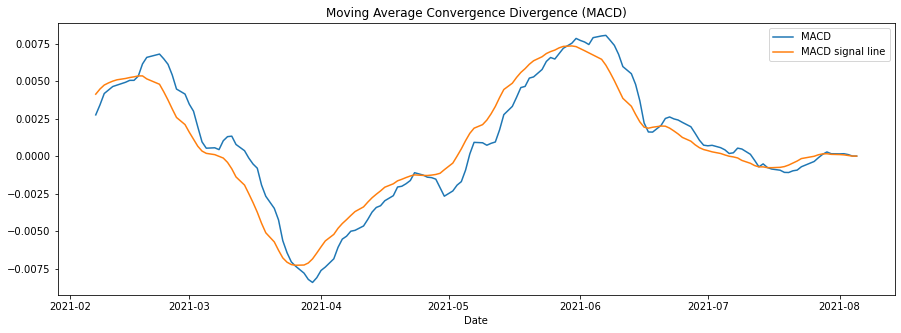

In [26]:
fig, ax = plt.subplots(figsize=(15,5))  # Create a figure and an axes.
ax.plot(stock_df['macd'], label='MACD')  # Plot some data on the axes.
ax.plot(stock_df['macds'], label='MACD signal line')  # Plot some data on the axes.

ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('')  # Add a y-label to the axes.
ax.set_title("Moving Average Convergence Divergence (MACD)")  # Add a title to the axes.
ax.legend()  # Add a legend.